<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [4]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

In [5]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 128.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 137.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 148.6 MB/s eta 0:00:00


In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


In [12]:
def make_graph(stock_data, revenue_data, stock_name):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(14, 8))
    
    # Plot stock price
    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Date'], stock_data['Close'], color='red', linewidth=1)
    plt.title(f'{stock_name} Stock Price and Revenue')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    
    # Plot revenue
    plt.subplot(2, 1, 2)
    plt.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='blue', linewidth=1)
    plt.xlabel('Date')
    plt.ylabel('Revenue (USD)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    print("make_graph function defined successfully!")

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [9]:
import yfinance as yf 

tesla = yf.Ticker("TSLA")
print("yfinance imported successfully!")

yfinance imported successfully!


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [10]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [13]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [14]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [15]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])
print(tesla_revenue)

Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [16]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
print("Webpage downloaded successfully")

Webpage downloaded successfully


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [17]:
soup = BeautifulSoup(html_data, 'html.parser')
tables = soup.find_all('table') 
print(f"Found {len(tables)} tables on the page") 

for i, table in enumerate(tables):
    if 'Tesla Quarterly Revenue'in str(table):
        print(f"Found Tesla Revenue table at index {i}") 
        target_table = table
        break 
else:
    target_table = tables[1]
    print("Using table at index 1")

Found 6 tables on the page
Found Tesla Revenue table at index 1


In [18]:
for row in target_table.tbody.find_all('tr'): 
    cols = row.find_all('td') 
    if len(cols)== 2: 
        date = cols[0].text.strip() 
        revenue = cols[1].text.strip() 

        new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]}) 
        tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

print("Data extracted successfully!") 
print(f"DataFrame now has {len(tesla_revenue)} rows")

Data extracted successfully!
DataFrame now has 54 rows


In [19]:
print("Tesla Revenue DataFrame:") 
print(tesla_revenue.head(10)) 
print(f"\nTotal rows: {len(tesla_revenue)}")

Tesla Revenue DataFrame:
         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757
5  2021-06-30  $11,958
6  2021-03-31  $10,389
7  2020-12-31  $10,744
8  2020-09-30   $8,771
9  2020-06-30   $6,036

Total rows: 54


In [20]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [21]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
print("Data cleaned successfully!")
print(tesla_revenue.tail())

Data cleaned successfully!
          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [22]:
print("Last 5 rows of Tesla Revenue Data:")
print(tesla_revenue.tail())

Last 5 rows of Tesla Revenue Data:
          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [35]:
import yfinance as yf 

gme = yf.Ticker("GME")
print("GameStop ticker object created successfully!")

GameStop ticker object created successfully!


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [36]:
gme_data = gme.history(period="max") 
print("GameStop stock data extracted successfully!") 
print(f"Data shape: {gme_data.shape}")

GameStop stock data extracted successfully!
Data shape: (5962, 7)


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [37]:
gme_data.reset_index(inplace=True) 
print("First 5 rows of GameStop data:") 
print(gme_data.head())

First 5 rows of GameStop data:
                       Date      Open  ...  Dividends  Stock Splits
0 2002-02-13 00:00:00-05:00  1.620129  ...        0.0           0.0
1 2002-02-14 00:00:00-05:00  1.712707  ...        0.0           0.0
2 2002-02-15 00:00:00-05:00  1.683250  ...        0.0           0.0
3 2002-02-19 00:00:00-05:00  1.666418  ...        0.0           0.0
4 2002-02-20 00:00:00-05:00  1.615920  ...        0.0           0.0

[5 rows x 8 columns]


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [38]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text 

print("Webpage download successfully as html_data_2") 
print(f"First 500 characters: {html_data_2[:500]}...")

Webpage download successfully as html_data_2
First 500 characters: <!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g...


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [39]:
from bs4 import BeautifulSoup 

soup_2 = BeautifulSoup(html_data_2, 'html.parser') 
print("HTML parsed successfully with html.parser!") 
print(f"Title of the page: {soup_2.title.text if soup_2.title else 'No title found'}")

HTML parsed successfully with html.parser!
Title of the page: GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data_2 = requests.get(url).text

soup_2 = BeautifulSoup(html_data_2, 'html.parser')

tables = soup_2.find_all('table')
print(f"Found {len(tables)} tables")


gme_table = tables[1]
print("Selected table at index 1 for GameStop revenue")


rows = gme_table.find_all('tr')
data = []

for row in rows:
    cols = row.find_all('td')
    if len(cols) == 2:  
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

print("GameStop Revenue DataFrame created successfully!")
print(f"Found {len(gme_revenue)} rows of data")
print("\nFirst 5 rows:")
print(gme_revenue.head())

Found 6 tables
Selected table at index 1 for GameStop revenue
GameStop Revenue DataFrame created successfully!
Found 54 rows of data

First 5 rows:
         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [5]:
print("Last 5 rows of GameStop Revenue Data:") 
print(gme_revenue.tail())

Last 5 rows of GameStop Revenue Data:
          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31        
52  2009-09-30     $46
53  2009-06-30     $27


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, stock_name):
    # Convert to datetime and ensure numeric data
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    revenue_data['Revenue'] = pd.to_numeric(revenue_data['Revenue'], errors='coerce')
    
    # Create the plot
    plt.figure(figsize=(14, 8))
    
    # Plot stock price (top graph)
    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Date'], stock_data['Close'], color='red', linewidth=1)
    plt.title(f'{stock_name} Stock Price and Revenue')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    
    # Plot revenue (bottom graph)
    plt.subplot(2, 1, 2)
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], color='blue', linewidth=1)
    plt.xlabel('Date')
    plt.ylabel('Revenue (USD)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

print("make_graph function defined successfully!")

make_graph function defined successfully!


In [9]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Recreate Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print("✅ Tesla stock data recreated!")

# Recreate GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print("✅ GameStop stock data recreated!")

# Recreate Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
tables = soup.find_all('table')
tesla_table = tables[1]  # Tesla revenue is usually at index 1

rows = tesla_table.find_all('tr')
data = []
for row in rows:
    cols = row.find_all('td')
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', '', regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
print("✅ Tesla revenue data recreated!")

# Recreate GameStop revenue data
gme_table = tables[1]  # GameStop revenue is also at index 1
rows = gme_table.find_all('tr')
data = []
for row in rows:
    cols = row.find_all('td')
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', '', regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
print("✅ GameStop revenue data recreated!")

print("\n🎉 ALL DATA RECREATED SUCCESSFULLY!")

✅ Tesla stock data recreated!
✅ GameStop stock data recreated!
✅ Tesla revenue data recreated!
✅ GameStop revenue data recreated!

🎉 ALL DATA RECREATED SUCCESSFULLY!


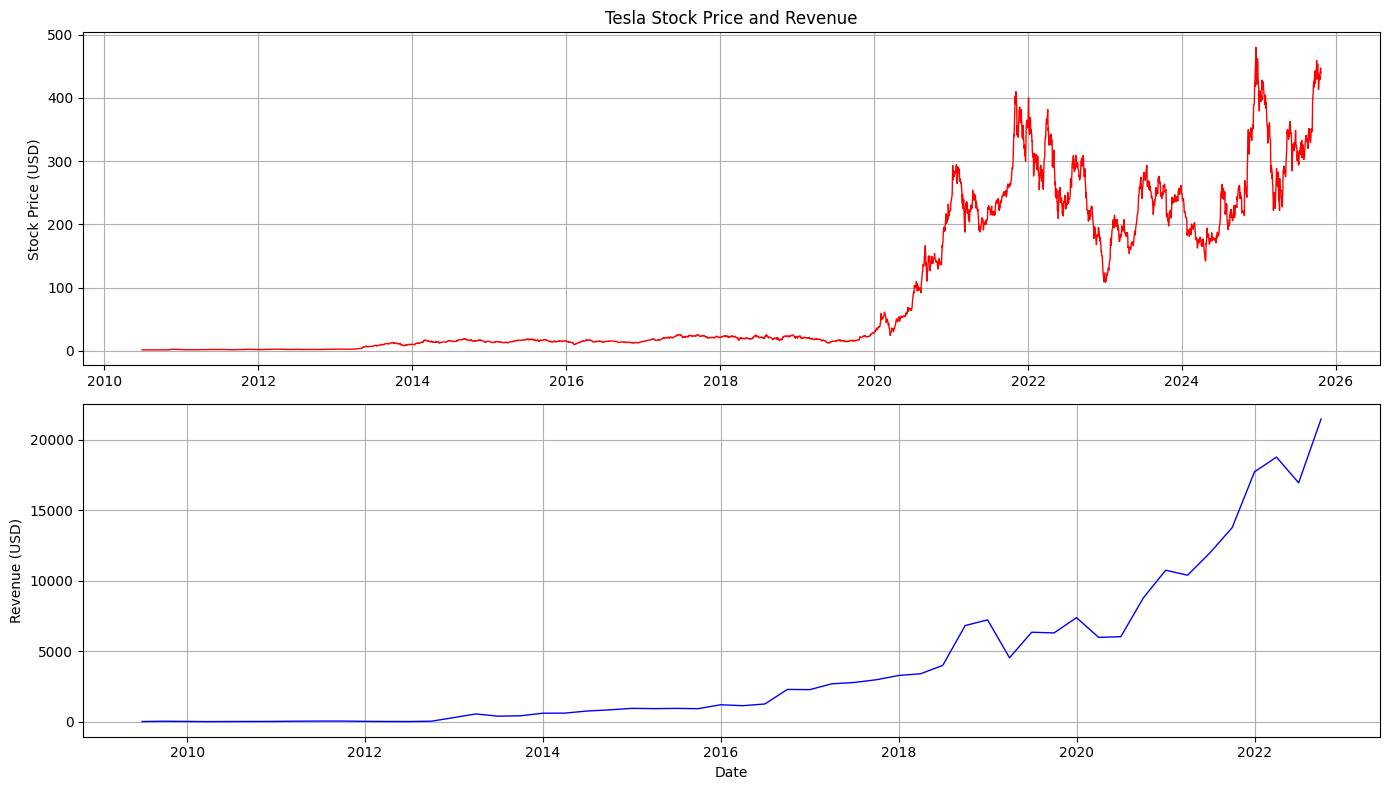

In [10]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


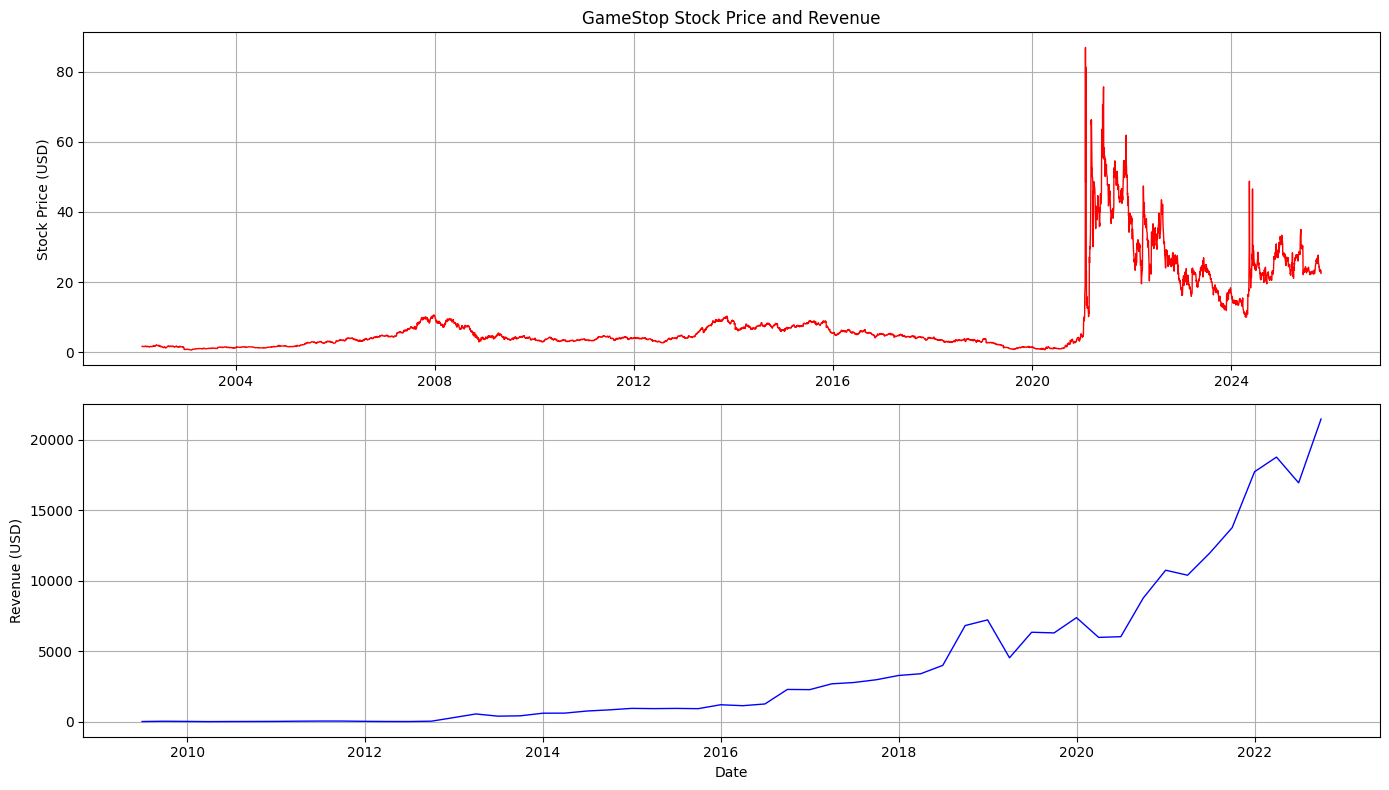

In [11]:
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
